# Introduction to Pandas
## 15/01-2021 Mark Kamper Svendsen and Nikolaj Rørbæk Knøsgaard

This notebook introduces pandas by looking at the "Porphyrin based dyes" dataset from the cmr: https://cmr.fysik.dtu.dk/dssc/dssc.html#dssc


The study is described in the following papers:

Kristian B. Ørnsø, Juan M. García-Lastra and Kristian S. Thygesen

Computational screening of functionalized zinc porphyrins for dye sensitized solar cells

Phys. Chem. Chem. Phys., 2013, 15, 19478-19486

Kristian B. Ørnsø, Christian S. Pedersen, Juan M. García-Lastra and Kristian S. Thygesen

Optimizing porphyrins for dye sensitized solar cells using large-scale ab initio calculations

Phys. Chem. Chem. Phys., 2014, 16, 16246-16254

## Why use pandas?

### Popular and easy!
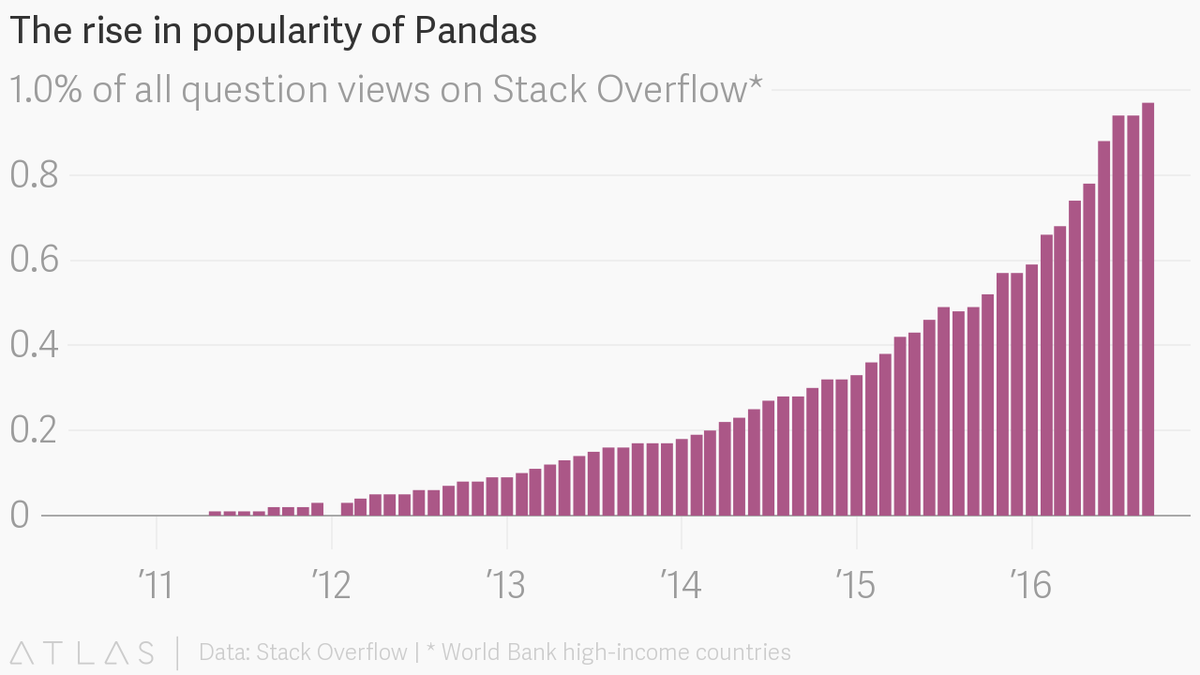
(Source: https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/)


### Imports 

In [1]:
import json
import pandas as pd
from ase import Atoms

## Loading data and setting up the data frames

In [2]:
data_dir = "" # Specify your data path (Folder in which the files are placed)

In [3]:
# Loading the data as pandas DataFrame
data_df = pd.DataFrame(json.load(open(data_dir + "train.json", "rb")))

## Transform atoms entry to ASE atoms object
data_df.atoms = data_df.atoms.apply(lambda x: Atoms(**x)) # OBS This one is important!

# Pandas commands

### DataFrame head:
Using the ".head(n)" we can see the first "n" lines of the data frame. This can help a lot when trying to figure out what entries exist in a given data set.

In [5]:
data_df.head(n = 30000)

,formula,energy,mass,E_gap,KS_gap,atoms
7465,TiC63F10H38N4O3,-778.280065,1136.873032,3.964256,1.534403,"(Atom('C', [11.9822242501, 25.3989654616, 9.72..."
10902,TiC75F8H43N7O6S,-935.355899,1370.126225,3.142127,0.752820,"(Atom('C', [15.5658780205, 20.0878222144, 9.54..."
3467,ZnC83F8H53N7O2,-1006.671405,1397.751225,2.900543,0.848549,"(Atom('C', [12.1166765284, 25.7664850742, 10.1..."
2420,ZnC73F8H60N4O4,-935.786791,1274.674225,4.060018,1.636423,"(Atom('C', [11.9754118551, 23.8575643497, 9.59..."
11955,TiC65F8H37N5O7S2,-822.675958,1264.013225,3.323376,0.941463,"(Atom('C', [15.3824310276, 20.5716972912, 9.00..."
...,...,...,...,...,...,...
10505,TiC73F8H47N5O9,-932.231542,1338.059225,3.328633,0.973231,"(Atom('C', [12.4987768285, 23.8248634626, 10.5..."
11390,TiC83F8H52N8O9S,-1064.324074,1537.290225,2.692172,0.400450,"(Atom('C', [17.0447851992, 22.9316736907, 10.4..."
1081,ZnC83H57N7O4S,-1010.246007,1313.854000,3.496702,1.190357,"(Atom('C', [16.425226755, 20.1023703473, 9.861..."
1124,ZnC73H53N7O2S,-897.816550,1157.714000,3.557536,1.287902,"(Atom('C', [15.0778528358, 17.4490037949, 10.4..."


### DataFrame columns:
The .columns() command lets us see which columns are in the DataFrame.

In [5]:
data_df.columns

Index(['formula', 'energy', 'mass', 'E_gap', 'KS_gap', 'atoms'], dtype='object')

This again helps one understand the given data set

### DataFrame shape:
The .shape command lets us check the shape of the data frame.

In [6]:
data_df.shape

(10886, 6)

### DataFrame types:
The ".dtypes" commands lets us check the data type of the different columns in the data frame

In [7]:
data_df.dtypes

formula     object
energy     float64
mass       float64
E_gap      float64
KS_gap     float64
atoms       object
dtype: object

#### Changing data types:
Sometimes you may want to change the data type of a column. That can be done in the following way: (Here making the rather weird change from float to object but you get the idea)

In [8]:
data_df_dtypechange = data_df.copy()
data_df_dtypechange.energy = data_df.energy.astype('O')

## Reindexing a pandas DataFrame:
In the case here, the indicies used for the DataFrame are some ID number used in the original database and thus apear quite arbitrary. We might therefore want to reindex the entries according to something more informative such as say the stoichiometry. To do this we can run:

In [9]:
data_df_reidx = data_df.set_index(data_df["formula"])

In [10]:
data_df_reidx.head()

,formula,energy,mass,E_gap,KS_gap,atoms
formula,,,,,,
TiC63F10H38N4O3,TiC63F10H38N4O3,-778.280065,1136.873032,3.964256,1.534403,"(Atom('C', [11.9822242501, 25.3989654616, 9.72..."
TiC75F8H43N7O6S,TiC75F8H43N7O6S,-935.355899,1370.126225,3.142127,0.752820,"(Atom('C', [15.5658780205, 20.0878222144, 9.54..."
ZnC83F8H53N7O2,ZnC83F8H53N7O2,-1006.671405,1397.751225,2.900543,0.848549,"(Atom('C', [12.1166765284, 25.7664850742, 10.1..."
ZnC73F8H60N4O4,ZnC73F8H60N4O4,-935.786791,1274.674225,4.060018,1.636423,"(Atom('C', [11.9754118551, 23.8575643497, 9.59..."
TiC65F8H37N5O7S2,TiC65F8H37N5O7S2,-822.675958,1264.013225,3.323376,0.941463,"(Atom('C', [15.3824310276, 20.5716972912, 9.00..."


If we choose to reindex the DataFrame according to the formula it might not make sense to keep the "formula" entry. In such a case we can drop an index:

In [11]:
data_df_reidx = data_df_reidx.drop(["formula"], axis = 1)

In [12]:
data_df_reidx.head()

,energy,mass,E_gap,KS_gap,atoms
formula,,,,,
TiC63F10H38N4O3,-778.280065,1136.873032,3.964256,1.534403,"(Atom('C', [11.9822242501, 25.3989654616, 9.72..."
TiC75F8H43N7O6S,-935.355899,1370.126225,3.142127,0.752820,"(Atom('C', [15.5658780205, 20.0878222144, 9.54..."
ZnC83F8H53N7O2,-1006.671405,1397.751225,2.900543,0.848549,"(Atom('C', [12.1166765284, 25.7664850742, 10.1..."
ZnC73F8H60N4O4,-935.786791,1274.674225,4.060018,1.636423,"(Atom('C', [11.9754118551, 23.8575643497, 9.59..."
TiC65F8H37N5O7S2,-822.675958,1264.013225,3.323376,0.941463,"(Atom('C', [15.3824310276, 20.5716972912, 9.00..."


## Sorting
It is possible to sort a DataFrame according to any one of its columns. One example here could be to sort the molecule according to their mass 

In [13]:
# In ascending order(Default):
data_df_sorted_ascending = data_df.sort_values(by = "mass", ascending = True)
# In decending order:
data_df_sorted_decending = data_df.sort_values(by = "mass", ascending = False)

In [14]:
# We can quickly check that the sorting worked
data_df_sorted_ascending.head()

,formula,energy,mass,E_gap,KS_gap,atoms
4065,C44H29N5O2,-537.176373,659.749,4.377475,1.291842,"(Atom('C', [10.826754058, 16.8778290567, 7.524..."
4614,C45H28N4O3,-540.000651,672.744,4.590845,1.643670,"(Atom('C', [10.8733702275, 16.5200504888, 7.54..."
5828,C45H28N4O3,-540.152543,672.744,4.281061,1.464074,"(Atom('C', [10.8635488011, 18.7488913682, 7.53..."
4293,C44H30N4O4,-547.143729,678.748,4.194673,1.343536,"(Atom('C', [10.7444245357, 16.8755201558, 7.23..."
5162,C47H30N4O2,-559.570168,682.783,4.268661,1.483257,"(Atom('C', [10.8745079708, 19.7288114978, 7.53..."


In [15]:
data_df_sorted_decending.head()

,formula,energy,mass,E_gap,KS_gap,atoms
3721,ZnC105F8H67N7O8,-1283.030767,1772.099225,2.525562,0.540736,"(Atom('C', [17.0616649561, 25.2848936116, 10.9..."
2589,ZnC105F8H67N7O8,-1283.236756,1772.099225,2.656855,0.724017,"(Atom('C', [17.1150576134, 23.6417486535, 10.9..."
10308,TiC105F8H67N7O9,-1298.586911,1770.585225,2.542661,0.572518,"(Atom('C', [17.130810677, 23.7753592321, 10.55..."
11630,TiC105F8H67N7O9,-1298.126426,1770.585225,2.364932,0.385842,"(Atom('C', [17.0514783646, 25.3140763246, 10.5..."
9617,TiC112H79N7O11,-1389.451952,1746.769000,2.582621,0.729278,"(Atom('C', [17.2245978883, 25.2688138407, 13.5..."


## Slicing:
Sometimes we might want to access just some of the columns, say the mass and the quasi-particle gap. To this end, the DataFrame can be sliced in the following way:


In [16]:
data_df[["mass", "E_gap"]]

,mass,E_gap
7465,1136.873032,3.964256
10902,1370.126225,3.142127
3467,1397.751225,2.900543
2420,1274.674225,4.060018
11955,1264.013225,3.323376
...,...,...
10505,1338.059225,3.328633
11390,1537.290225,2.692172
1081,1313.854000,3.496702
1124,1157.714000,3.557536


## Selection by position:
It is also possible to select by position:

In [17]:
# Say for example the first entry in the data base:
data_df.atoms[0]

Atoms(symbols='C63H38F10N4O3Ti', pbc=False, cell=[31.77204443, 33.72866551, 19.3211])

In [18]:
# or the 100th entry in the data base:
data_df.iloc[100:101]

,formula,energy,mass,E_gap,KS_gap,atoms
10602,TiC71F18H27N5O3,-840.649398,1387.867257,3.143704,0.867824,"(Atom('C', [11.0431002588, 23.8096057855, 10.5..."


In [19]:
# or the 20th-30th entries in the data base:
data_df.iloc[20:30]

,formula,energy,mass,E_gap,KS_gap,atoms
5343,C67H52N4O2,-813.674654,945.179000,3.725954,1.340369,"(Atom('C', [11.9351119514, 25.3318869378, 9.65..."
5498,C83H70N6O2,-1033.983021,1183.513000,3.213615,1.058844,"(Atom('C', [11.7066446254, 25.6845545235, 10.2..."
2396,ZnC56F8H44N4O8,-754.834593,1118.355225,4.090683,1.411343,"(Atom('C', [11.9029602927, 16.8428778392, 9.62..."
7369,TiC65H46N4O9,-825.200623,1074.969000,3.545413,1.367041,"(Atom('C', [12.0245100016, 25.34014871, 8.8624..."
1972,ZnC71H53N7O5S2,-900.361105,1213.749000,3.084045,0.872644,"(Atom('C', [11.7311303605, 23.0775563321, 10.3..."
10031,TiC74H53N5O11S2,-957.255499,1300.249000,3.368067,1.226313,"(Atom('C', [15.5320315318, 20.5846803099, 13.3..."
1061,ZnC77H53N7O2S,-932.456117,1205.758000,3.465908,1.215662,"(Atom('C', [16.0838128079, 20.1091160215, 10.2..."
4371,C66H52N6O8S,-858.918311,1089.236000,3.287627,0.869771,"(Atom('C', [16.3162744575, 17.1249923936, 9.49..."
9176,TiC94H63N7O7S2,-1158.658111,1514.567000,3.104874,0.920901,"(Atom('C', [16.4209815364, 20.1099647134, 13.4..."
9445,TiC78H47N5O5,-926.935350,1182.131000,3.286405,1.186264,"(Atom('C', [15.5061936782, 25.3346927178, 13.2..."


## Simple statistics with pandas

In [20]:
# Mean of column:
mean_mass = data_df["mass"].mean()
print("The mean mass is {m:0.1f}".format(m = mean_mass))

# Standard deviation:
std_mass = data_df["mass"].std()
print("The standard deviation of the mass is {m:0.1f}".format(m = std_mass))

# Variance:
var_mass = data_df["mass"].var()
print("The variance of the mass is {m:0.1f}".format(m = var_mass))



# Minimum value
min_mass = data_df["mass"].min()
print("The minimum mass is {m:0.1f}".format(m = min_mass))


# Minimum value
max_mass = data_df["mass"].max()
print("The maximum mass is {m:0.1f}".format(m = max_mass))



The mean mass is 1194.8
The standard deviation of the mass is 176.2
The variance of the mass is 31037.1
The minimum mass is 659.7
The maximum mass is 1772.1


It is also possible to get the full description using the describe command:

In [21]:
data_df.describe()

,energy,mass,E_gap,KS_gap
count,10886.000000,10886.000000,10886.000000,10886.000000
mean,-865.164568,1194.777961,3.523046,1.126336
std,158.596535,176.173623,0.438574,0.319024
min,-1389.745933,659.749000,2.308382,0.076216
25%,-980.454566,1072.731032,3.208813,0.902165
50%,-864.663230,1190.299000,3.501314,1.120204
75%,-743.371072,1312.340000,3.834026,1.361380
max,-524.356344,1772.099225,4.739216,2.014285


### Correlation matrix
We can also extract the correlation matrix using pandas

In [22]:
corr = data_df.corr()

In [23]:
print(corr)

          energy      mass     E_gap    KS_gap
energy  1.000000 -0.805200  0.739604  0.550812
mass   -0.805200  1.000000 -0.765312 -0.651942
E_gap   0.739604 -0.765312  1.000000  0.895061
KS_gap  0.550812 -0.651942  0.895061  1.000000


In [24]:
# Plotting the correlation matrix
corr.style.background_gradient(cmap="hot")

,energy,mass,E_gap,KS_gap
energy,1,-0.8052,0.739604,0.550812
mass,-0.8052,1,-0.765312,-0.651942
E_gap,0.739604,-0.765312,1,0.895061
KS_gap,0.550812,-0.651942,0.895061,1


# Exercises:
## 1: Write code that takes an ASE atoms object and returns the Coulomb matrix
## 2: Make a suitable choice of sorting for Coulomb matrix so as to make the finger print invariant of the atoms list ordering
## 3: Perform multilinear regression (Normal least square AND Ridge) and use that to fit the formation energy 
## 4: Experiment with PCA to speed up the modelling process
      #### OBS: Remember to normalize and center each column around zero! Otherwise you cannot get the PCA directly from SVD